# Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d


import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.linear_model as skl_lm



In [2]:
# Importing the Advertising dataset
advertising = pd.read_csv('data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
# Importing the Credit dataset
credit = pd.read_csv('data/Credit.csv')
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [4]:
# Have a look at the first few rows of the data
credit.head(3)

Unnamed: 0   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
0           1   14.891   3606     283      2   34         11    Male      No   
1           2  106.025   6645     483      3   82         15  Female     Yes   
2           3  104.593   7075     514      4   71         11    Male      No   

  Married  Ethnicity  Balance  
0     Yes  Caucasian      333  
1     Yes      Asian      903  
2      No      Asian      580

In our DataFrame, we have a column named 'Student' which contains two values: 'Yes' and 'No'. A common practice for dealing with such binary variables (<strong>dummy</strong> variables) is to transform the values into 1 when the characteristic is present, and 0 when it is not.

In [5]:
# Mapping the values of the Student column to 0 and 1
credit['Student2'] = credit['Student'].apply(lambda x: 1 if x == 'Yes' else 0)
credit.head(3)

Unnamed: 0   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
0           1   14.891   3606     283      2   34         11    Male      No   
1           2  106.025   6645     483      3   82         15  Female     Yes   
2           3  104.593   7075     514      4   71         11    Male      No   

  Married  Ethnicity  Balance  Student2  
0     Yes  Caucasian      333         0  
1     Yes      Asian      903         1  
2      No      Asian      580         0

In [6]:
# importing the Auto dataset
auto = pd.read_csv('data/Auto.csv')
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


## Simple Linear Regression
 One of the key strengths of univariate linear regression (which involves only one predictor) is its simplicity in interpretation and ease of graphical representation.

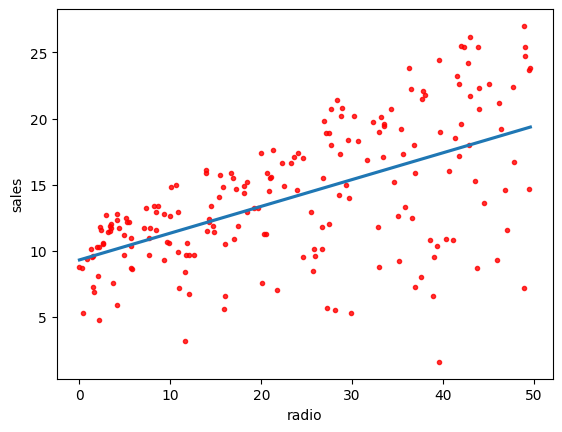

In [32]:
sns.regplot(x=advertising.radio, y=advertising.sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
# plt.xlim(-10,310)
# plt.ylim(ymin=0)
plt.show()

# Parameters estimation
In this section, we will estimate the same parameters using the two most important libraries for this type of analysis:
- statsmodels
- scikit-learn

In [41]:
# Statsmodels
est = smf.ols('sales ~ radio', advertising).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [46]:
# Manually calculate the error for the first observation
intercept = est.params.iloc[0]
slope = est.params.iloc[1]
first_x_obs = advertising.radio.iloc[0]
first_y_obs = advertising.sales.iloc[0]
first_y_obs_pred = intercept + slope * first_x_obs

print('Intercept:', intercept)
print('Slope:', slope)
print('First observation:', first_x_obs)
print('Predicted value:', first_y_obs_pred)
print('Real value:', first_y_obs)
print('Residual:', first_y_obs - first_y_obs_pred)


Intercept: 9.311638095158276
Slope: 0.20249578339243968
First observation: 37.8
Predicted value: 16.965978707392495
Real value: 22.1
Residual: 5.134021292607507


In [50]:
# Sklearn  (Scikit-learn)
regr = skl_lm.LinearRegression()

X = advertising.radio.values.reshape(-1,1)
y = advertising.sales

# Fit the linear regression
regr.fit(X,y)
new_intercept = regr.intercept_
new_slope = regr.coef_[0]

cond_1 = round(new_intercept, 4) == round(intercept, 4)
cond_2 = round(new_slope, 2) == round(slope, 2)

if cond_1 and cond_2:
    print('The values match')

The values match


# Multiple Linear Regression


In [54]:
# Parameters estimation with statsmodels
est = smf.ols('sales ~ TV + radio', advertising).fit()
est.summary() # .tables[1]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           4.83e-98
Time:                        19:51:33   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Correlation matrix
correlation_matrix = advertising.corr()
correlation_matrix

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

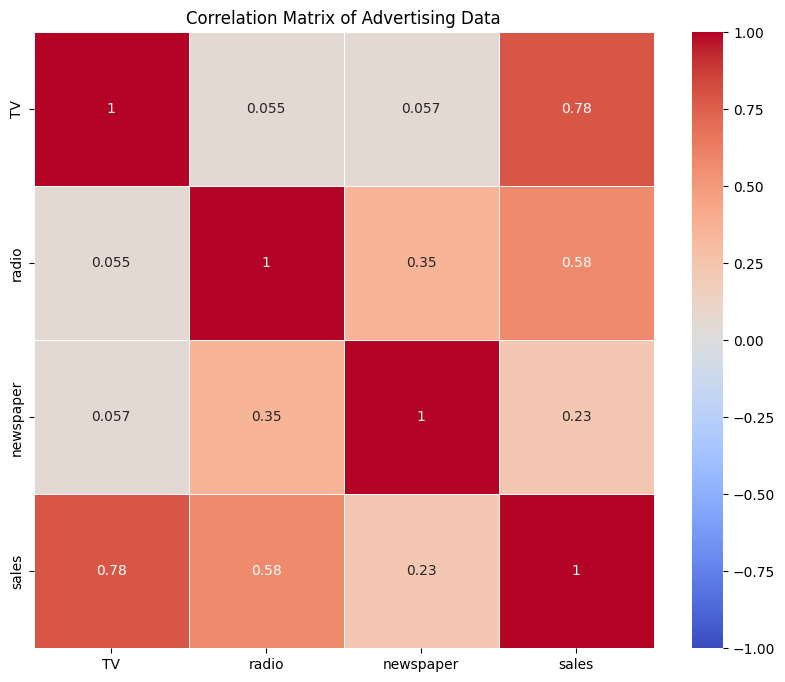

In [14]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Advertising Data')
plt.show()

In [15]:
# Parameters estimation with sklearn
regr = skl_lm.LinearRegression()

X = advertising[['radio', 'TV']]
y = advertising.sales

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[0.18799423 0.04575482]
2.921099912405138


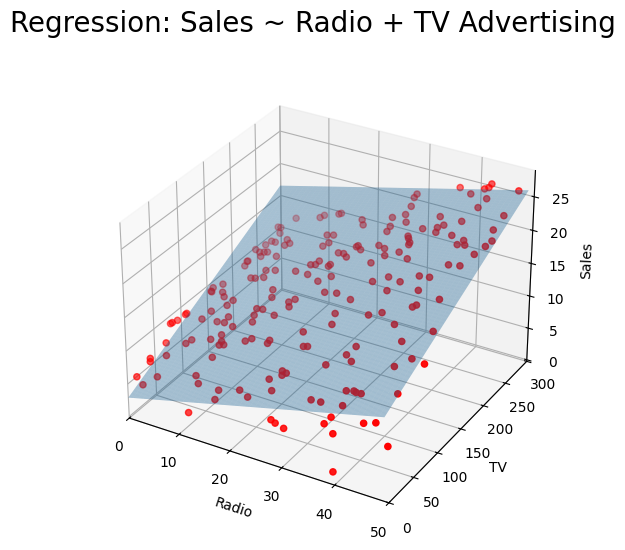

In [16]:
# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

# Create plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax.plot_surface(B1, B2, Z, rstride=1, cstride=1, alpha=0.4)
ax.scatter(advertising['radio'], advertising['TV'], advertising['sales'], c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0, 50)
ax.set_ylabel('TV')
ax.set_ylim(0, 300)
ax.set_zlabel('Sales')

plt.show()

# Other Considerations in the Regression Model

In [56]:
credit.head(3)

Unnamed: 0   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
0           1   14.891   3606     283      2   34         11    Male      No   
1           2  106.025   6645     483      3   82         15  Female     Yes   
2           3  104.593   7075     514      4   71         11    Male      No   

  Married  Ethnicity  Balance  Student2  
0     Yes  Caucasian      333         0  
1     Yes      Asian      903         1  
2      No      Asian      580         0

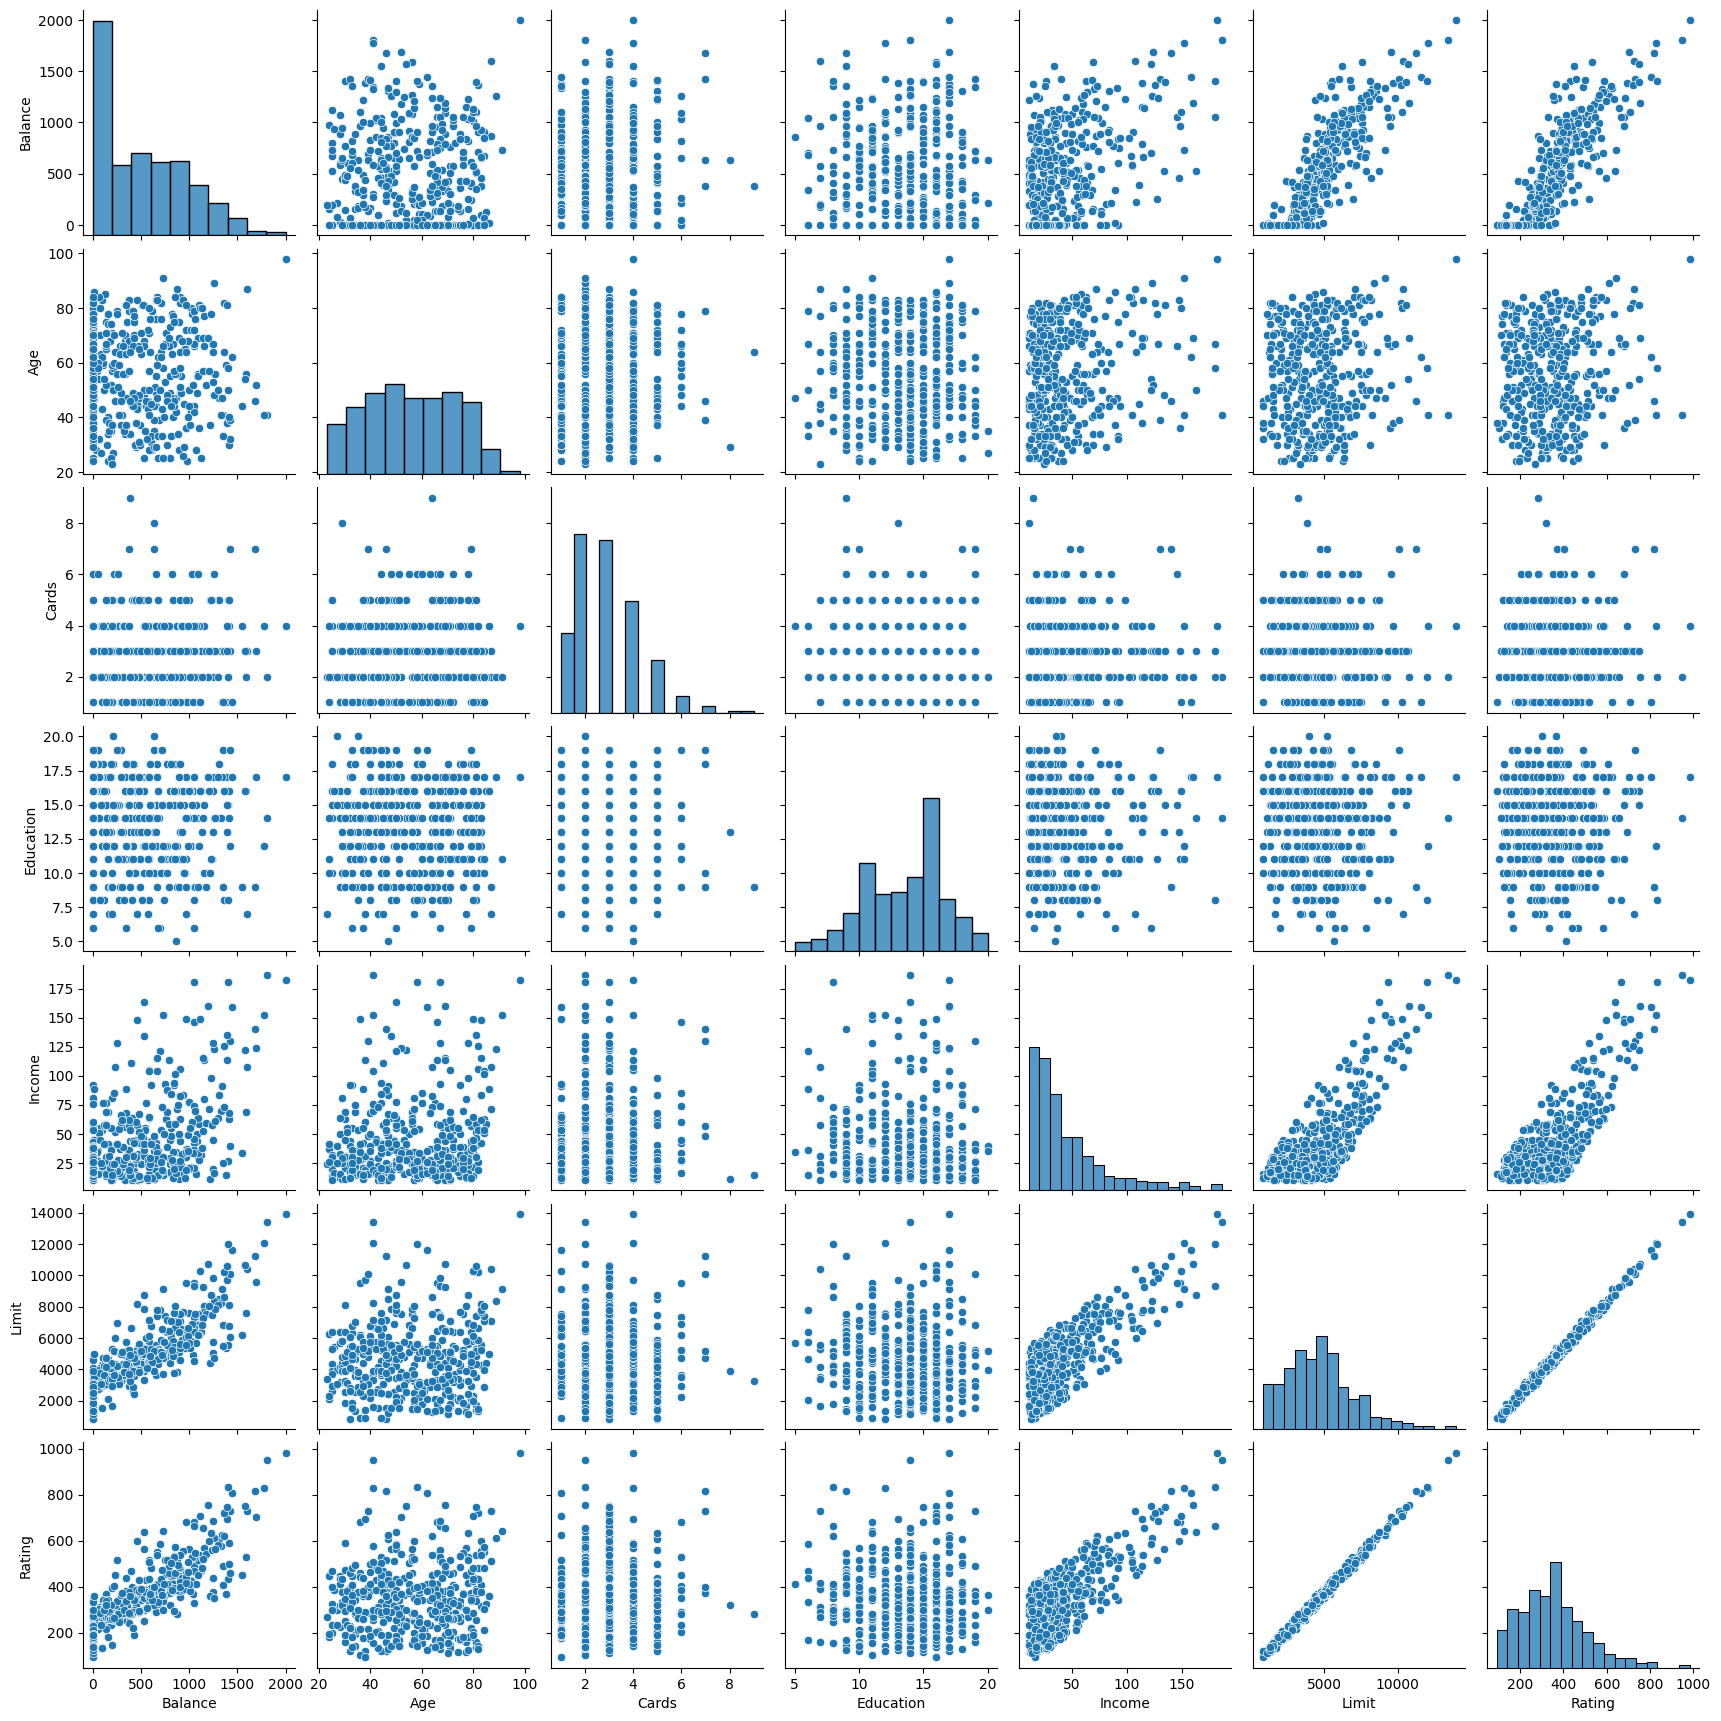

In [18]:
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']]);


In [19]:
# Parameters estimation with statsmodels on a dummy variable
est = smf.ols('Balance ~ Gender', credit).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [20]:
print(credit.Ethnicity.unique())

['Caucasian' 'Asian' 'African American']


In [21]:
# Parameters estimation with statsmodels on a multiple dummy variables
est = smf.ols('Balance ~ Ethnicity', credit).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

# Interaction beetween qualitative and quantitative variables

In [57]:
est1 = smf.ols('Balance ~ Income + Student2', credit).fit()
regr1 = est1.params
est2 = smf.ols('Balance ~ Income + Income*Student2', credit).fit()
regr2 = est2.params

print('Regression 1 - without interaction term')
print(regr1)
print('\nRegression 2 - with interaction term')
print(regr2)

Regression 1 - without interaction term
Intercept    211.142964
Income         5.984336
Student2     382.670539
dtype: float64

Regression 2 - with interaction term
Intercept          200.623153
Income               6.218169
Student2           476.675843
Income:Student2     -1.999151
dtype: float64


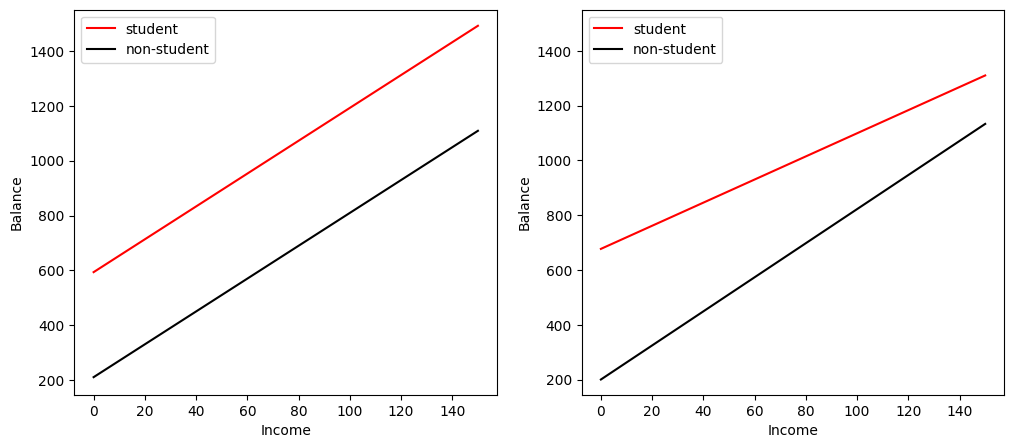

In [23]:
# Income (x-axis)
income = np.linspace(0,150)

# Balance without interaction term (y-axis)
student1 = np.linspace(regr1['Intercept']+regr1['Student2'],
                       regr1['Intercept']+regr1['Student2']+150*regr1['Income'])
non_student1 =  np.linspace(regr1['Intercept'], regr1['Intercept']+150*regr1['Income'])

# Balance with iteraction term (y-axis)
student2 = np.linspace(regr2['Intercept']+regr2['Student2'],
                       regr2['Intercept']+regr2['Student2']+
                       150*(regr2['Income']+regr2['Income:Student2']))
non_student2 =  np.linspace(regr2['Intercept'], regr2['Intercept']+150*regr2['Income'])

# Create plot
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(income, student1, 'r', income, non_student1, 'k')
ax2.plot(income, student2, 'r', income, non_student2, 'k')

for ax in fig.axes:
    ax.legend(['student', 'non-student'], loc=2)
    ax.set_xlabel('Income')
    ax.set_ylabel('Balance')
    ax.set_ylim(ymax=1550)

# Non-linear relationships

In [24]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [58]:
# Let's look at type of an element in the horsepower column
type(auto.horsepower.iloc[0])

numpy.float64

In [59]:
# Convert the horsepower column to numeric
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
 9   horsepower2   392 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 31.1+ KB


In [27]:
# Let's add the quadratic term of the horsepower
auto['horsepower2'] = auto.horsepower**2
auto.head(3)

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   

   origin                       name  horsepower2  
0       1  chevrolet chevelle malibu      16900.0  
1       1          buick skylark 320      27225.0  
2       1         plymouth satellite      22500.0

In [60]:
# Parameters estimation with statsmodels of a quadratic term and the linear term
est = smf.ols('mpg ~ horsepower', auto).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           7.03e-81
Time:                        20:42:18   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# Parameters estimation with statsmodels of a quadratic term and the linear term
est = smf.ols('mpg ~ horsepower + horsepower2', auto).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

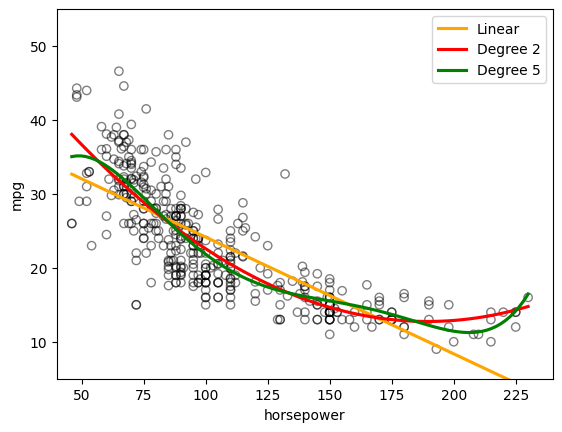

In [62]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k', alpha=.5) 
sns.regplot(x=auto.horsepower, y=auto.mpg, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(x=auto.horsepower, y=auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='red')
sns.regplot(x=auto.horsepower, y=auto.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);